## Analysis of average Hospital Stay Lengths by country, year, and hospital resources
In this analysis, we sourced a Kaggle dataset of hospital stay lengths by country, year, and hospital resources. We then analyzed the data to determine the average stay length for each country, year, and hospital resources. We used this data to determine correlations, if any, between the stay length and the hospital resources over time.
Import the necessary packages to perform the analysis.

The dataset for this analysis was sourced from Kaggle under [Healthcare Investments and Length of Hospital Stay](https://www.kaggle.com/datasets/babyoda/healthcare-investments-and-length-of-hospital-stay?datasetId=1034839)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Load the data.

In [56]:
dataset = pd.read_csv('./Healthcare_Investments_and_Hospital_Stay.csv')
dataset

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.60,1.43,16.71,1.43
1,AUS,1994,6.40,2.36,18.48,2.36
2,AUS,1995,6.50,2.89,20.55,2.89
3,AUS,1996,6.40,2.96,21.95,2.96
4,AUS,1997,6.20,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.80,10.57,22.17,10.57
514,LTU,2015,6.60,11.02,21.00,11.02
515,LTU,2016,6.60,12.20,23.01,12.20
516,LTU,2017,6.50,12.37,23.33,12.37


Unfortunately, we don't have a great idea of the units used in these columns. Usually Units are in integers, but we can't assume that the units are scaled to single units such as days or machines.

array([[<AxesSubplot:xlabel='Time', ylabel='Time'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='Time'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='Time'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='Time'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='Time'>],
       [<AxesSubplot:xlabel='Time', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='Hospital_Stay'>],
       [<AxesSubplot:xlabel='Time', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='MRI_Units'>],
       [<AxesSubplot:xlabel='Time', ylabel='CT_Scanners'>

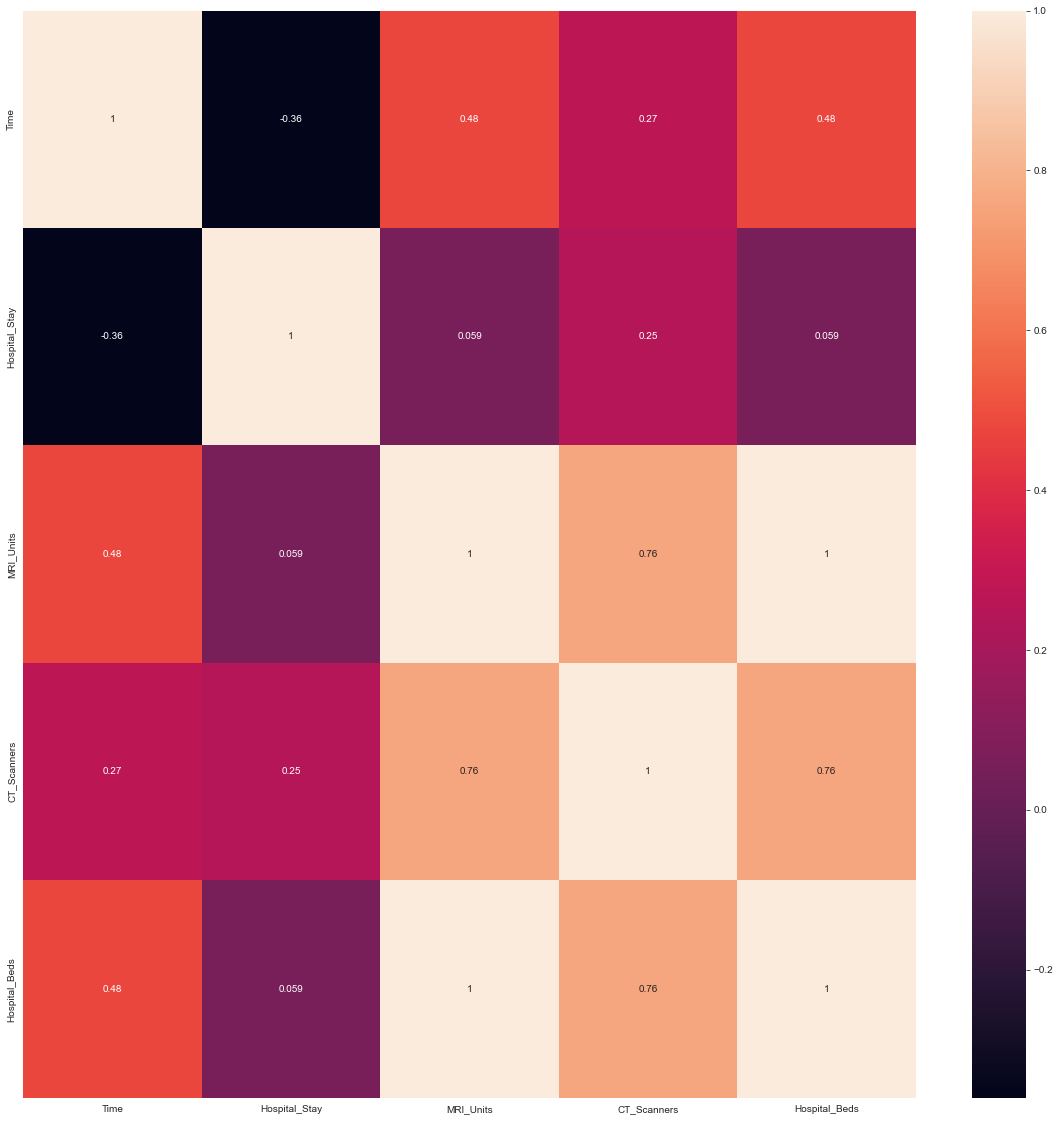

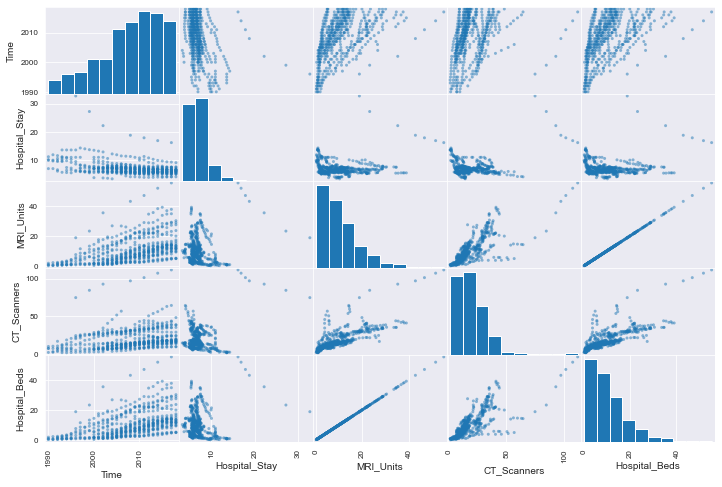

In [60]:
# Assume hospital stay is the dependent variable in units of days.
# create correlation heatmap of the dataset.
sns.heatmap(dataset.corr(), annot=True)
# Visualize the distribution of the dataset.
pd.plotting.scatter_matrix(dataset, figsize=(12, 8))


We can see that the number of hospital beds, CT scanners and MRI machines are positively correlated with Time (in years)
This suggests that the number of hospital beds, CT scanners and MRI machines have gradually increased over time. That's great for increasing patient capacity, but does it mean that hospital stay time decreases as a result?
Additionally, our data is not normally distributed. MRI Units and Hospital Beds are very strongly correlated with each other. These could potentially become redundant features in the model. Depending on the strength of the relationships, this could skew our regression models' estimations.

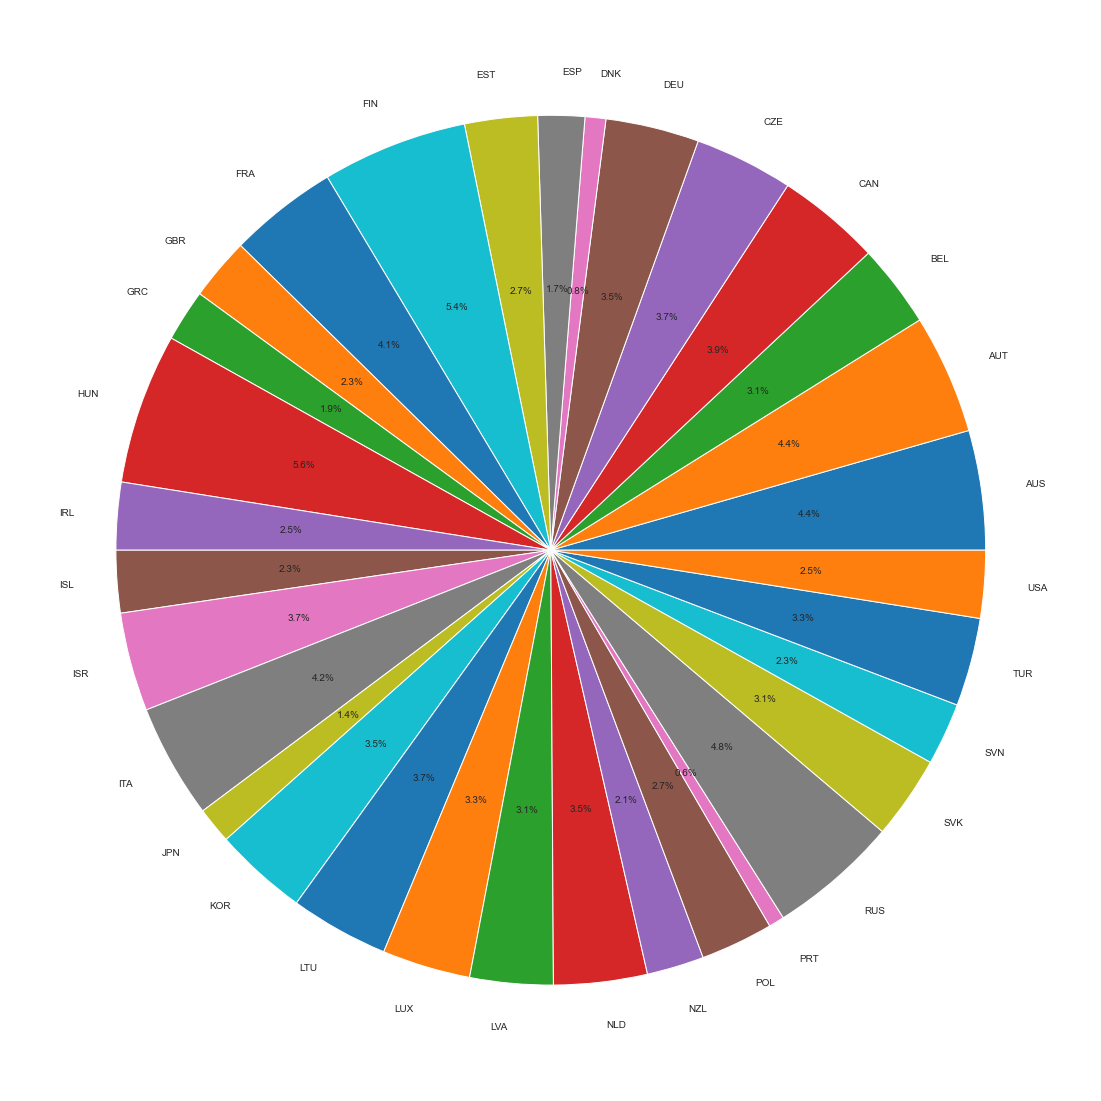

In [61]:
#select the location columns and create dummy variables for them.
locations = pd.get_dummies(dataset['Location'])
# locations
# Sum the columns of the dummy variables to get the percent of each location in the dataset. Visualize the percentage of each location as a pie chart.
location_pie = plt.pie(locations.sum()/len(locations), labels=locations.columns, autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (20,20)
plt.show(location_pie)

We can see that the percentage of each location is fairly even. This is a good sign that the data is not skewed.
This means we can utilize these features in our regression model down the line and draw relative strong conclusions about correlations in the data. It is important to note that the percentage of each location is not a good indicator of the relative importance of each location and that the data is not normally distributed. Also, the proportion of each location will be skewed and therefore positive samples will be less likely to be selected than negative samples. We will need to integrate all location features into our model to make sure that our model is not skewed.
Next, lets rescale the data to tease out more balanced connections and add the locations to the correlation matrix.

In [62]:
dataset = dataset.copy()
# create dummy variables for the locations.
dummy_locations = pd.get_dummies(dataset['Location'], prefix='Location')
dataset = pd.concat([dataset, dummy_locations], axis=1)
# drop the location column.
dataset = dataset.drop(['Location'], axis=1)
# rescale the data.
from sklearn.preprocessing import QuantileTransformer
scaled_data = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(dataset), columns=dataset.columns)
scaled_data

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds,Location_AUS,Location_AUT,Location_BEL,Location_CAN,Location_CZE,...,Location_LVA,Location_NLD,Location_NZL,Location_POL,Location_PRT,Location_RUS,Location_SVK,Location_SVN,Location_TUR,Location_USA
0,-2.05,-0.04,-1.39,0.12,-1.39,5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
1,-1.68,-0.17,-1.04,0.30,-1.04,5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
2,-1.56,-0.11,-0.88,0.36,-0.88,5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
3,-1.45,-0.17,-0.86,0.43,-0.86,5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
4,-1.35,-0.25,-0.77,0.47,-0.77,5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.75,0.14,0.22,0.44,0.22,-5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
514,0.95,-0.04,0.30,0.37,0.30,-5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
515,1.17,-0.04,0.44,0.46,0.44,-5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
516,1.49,-0.11,0.47,0.46,0.47,-5.20,-5.20,-5.20,-5.20,-5.20,...,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20


<Figure size 864x576 with 0 Axes>

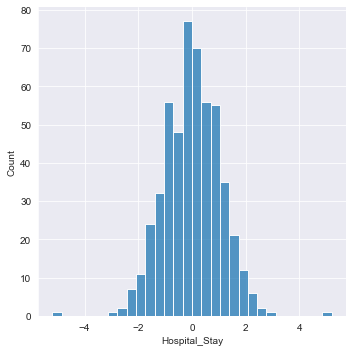

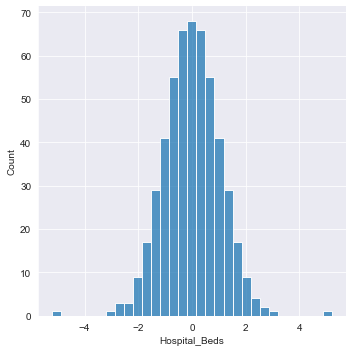

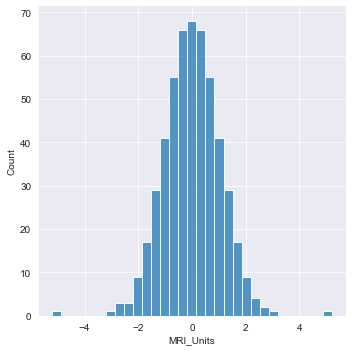

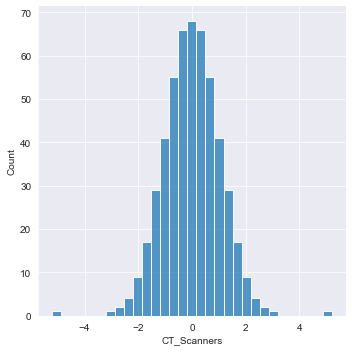

In [63]:
# visualize the distribution of the rescaled data.
fig = plt.figure(figsize=(12, 8))
sns.displot(scaled_data['Hospital_Stay'])
sns.displot(scaled_data['Hospital_Beds'])
sns.displot(scaled_data['MRI_Units'])
sns.displot(scaled_data['CT_Scanners'])
plt.show()
# The distribution of the rescaled data is much more normal. This means that the data is no longer skewed. Our transformed data is now ready for use in our regression model.

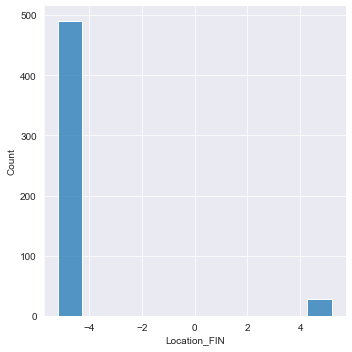

In [15]:
# An exmaple of the distribution of the rescaled Location data.
'''This data has more negative values than positive values even after rescaling. It's difficult to balance binary data, and this presents a bias in our Location data. If we were classifying the data, we might consider balancing the data by upsampling the positive samples using the SMOTE algorithm.'''
sns.displot(scaled_data['Location_FIN'])

array([[<AxesSubplot:xlabel='Time', ylabel='Time'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='Time'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='Time'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='Time'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='Time'>],
       [<AxesSubplot:xlabel='Time', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='Hospital_Stay'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='Hospital_Stay'>],
       [<AxesSubplot:xlabel='Time', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='Hospital_Stay', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='MRI_Units', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='CT_Scanners', ylabel='MRI_Units'>,
        <AxesSubplot:xlabel='Hospital_Beds', ylabel='MRI_Units'>],
       [<AxesSubplot:xlabel='Time', ylabel='CT_Scanners'>

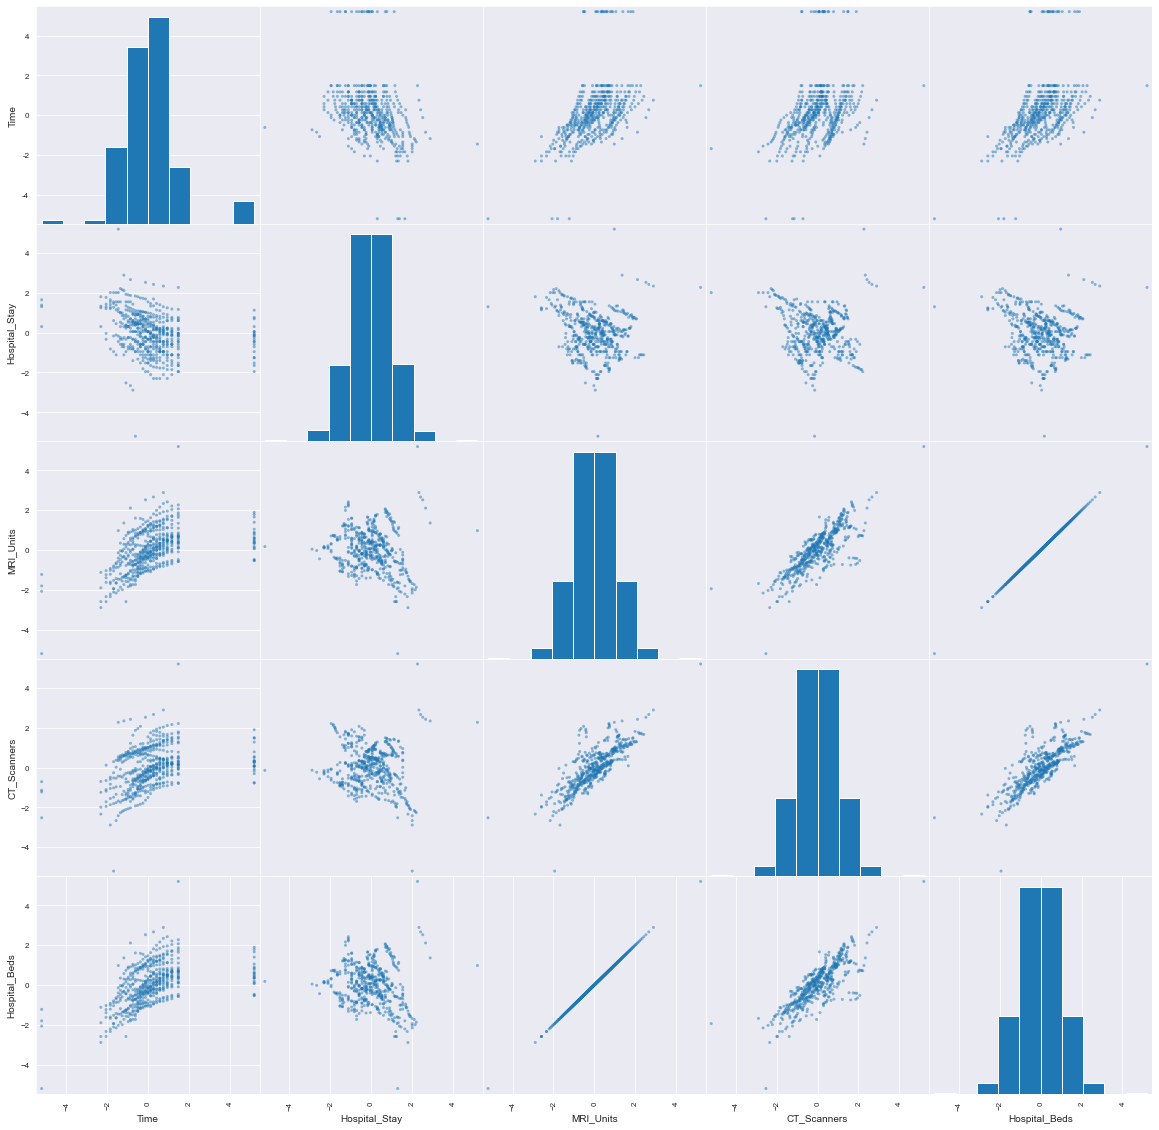

In [16]:
pd.plotting.scatter_matrix(scaled_data[['Time','Hospital_Stay','MRI_Units','CT_Scanners','Hospital_Beds']], figsize=(20, 20))
#Let's visualize the scatter matrix of the rescaled data. This will show us the relationship between each feature and the dependent variable.
# pd.plotting.scatter_matrix(scaled_data[['Hospital_Stay']].append(scaled_data.iloc[:,5:]), figsize=(20, 20))

<AxesSubplot:>

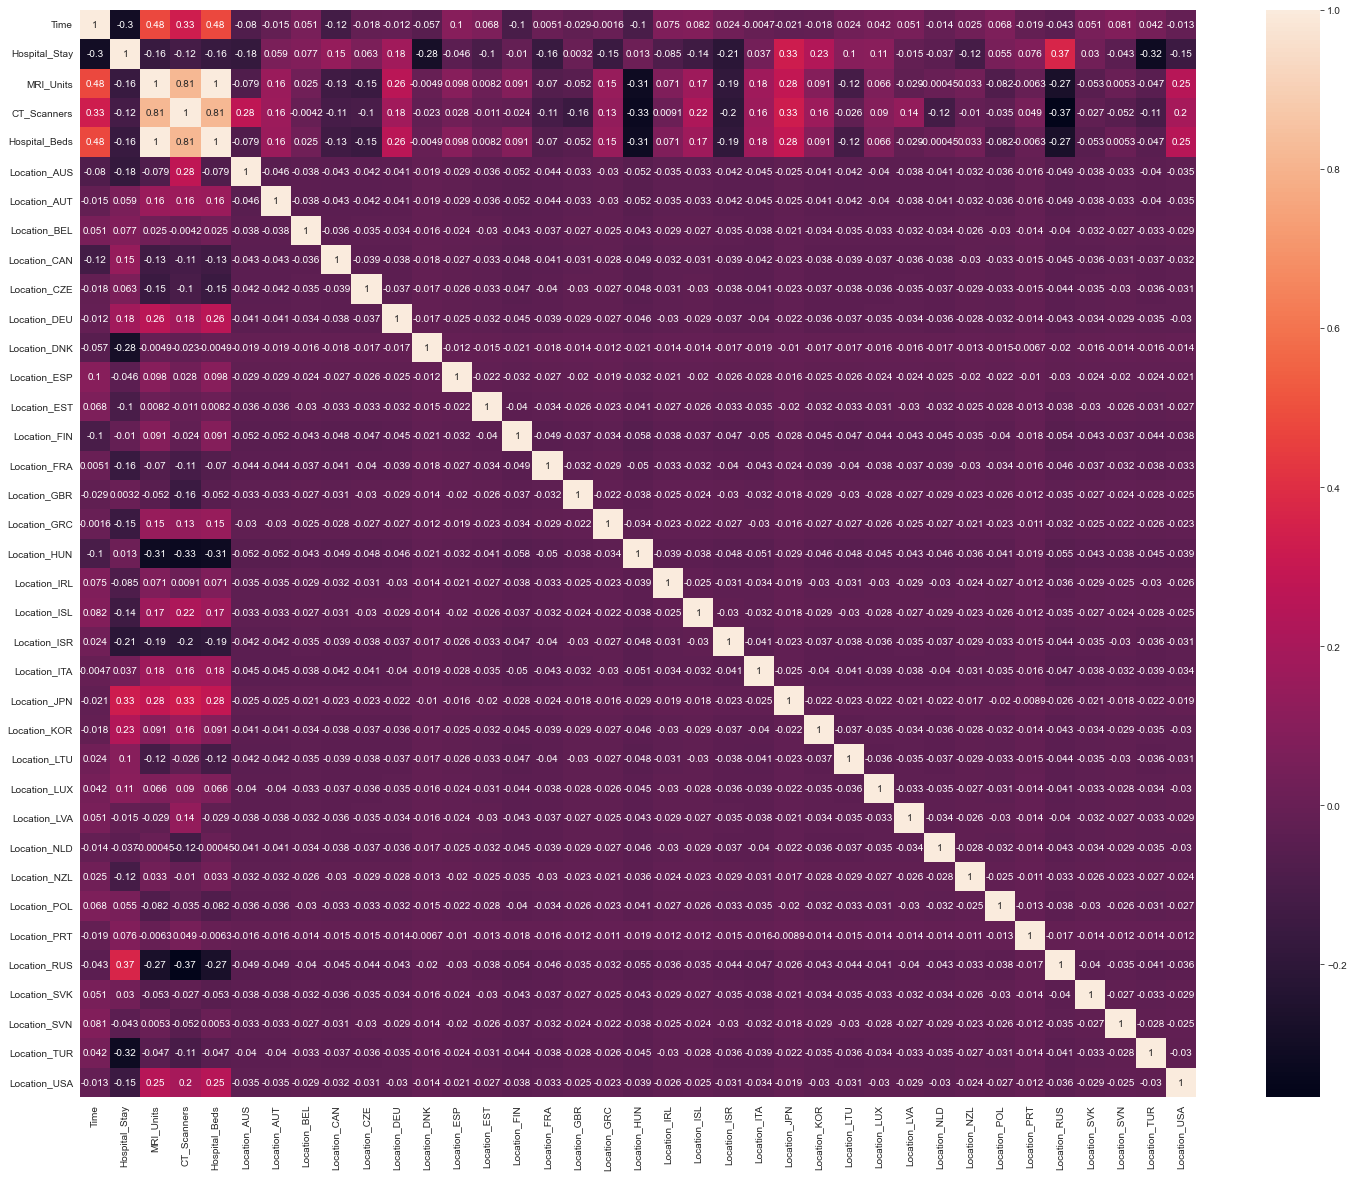

In [17]:
# create correlation heatmap of the dataset.
plt.subplots(figsize=(25,20))
sns.heatmap(scaled_data.corr(), annot=True)

<AxesSubplot:>

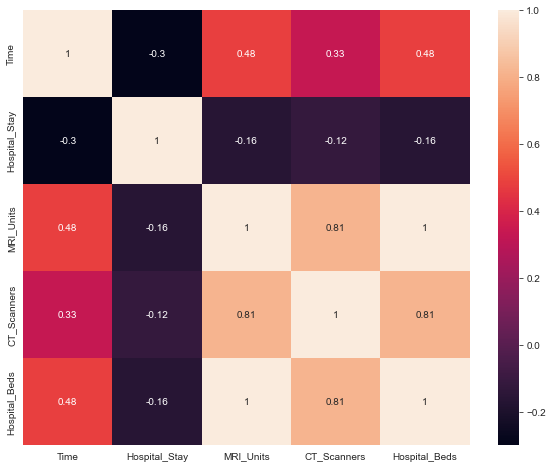

In [18]:
# A visualization of the correlation matrix of the rescaled data without the locations.
plt.subplots(figsize=(10,8))
sns.heatmap(scaled_data[['Time','Hospital_Stay','MRI_Units','CT_Scanners','Hospital_Beds']].corr(), annot=True)

We can start to see some stronger correlations between the features and the dependent variable (Hospital Stay) now that the data is rescaled!
Now let's perform a linear regression to predict the hospital stay. We will use the scaled data and the dummy variables for the locations.
We will import the lazypredict regressor python package to perform the regression.

In [19]:
# Ensure that your system has the MS C++ Build Tools installed before pip installing lazypredict.
# !pip install lazypredict

In [20]:
from lazypredict.Supervised import LazyRegressor
#create a train and test split.
from sklearn.model_selection import train_test_split
X = scaled_data.drop(['Hospital_Stay'], axis=1)
y = dataset['Hospital_Stay'] # We want to predict the original hospital stay time using the scaled dependent variable data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # We'll use 20% of the data for testing.

C:\Users\IceManLoo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:02<00:00, 19.78it/s]

                                      Adjusted R-Squared  \
Model                                                      
ExtraTreesRegressor                                 0.98   
RandomForestRegressor                               0.96   
BaggingRegressor                                    0.96   
XGBRegressor                                        0.94   
ExtraTreeRegressor                                  0.92   
GradientBoostingRegressor                           0.89   
DecisionTreeRegressor                               0.87   
KNeighborsRegressor                                 0.87   
MLPRegressor                                        0.85   
TransformedTargetRegressor                          0.84   
LinearRegression                                    0.84   
LassoCV                                             0.84   
RidgeCV                                             0.84   
Ridge                                               0.84   
ElasticNetCV                            

In [22]:
# print the name of the best model from the models dataframe
best_model = str(models.loc[models['Adjusted R-Squared'].idxmax()][4:])
best_model = re.search(r'(?<=Name: )[a-zA-Z]*', best_model).group(0)
print(best_model)

ExtraTreesRegressor


In [23]:
# from sklearn import the best model from the models dataframe.
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
# create a new model using the best model from the models dataframe.
model = ExtraTreesRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
model.fit(X_train, y_train)
# make predictions on the test set.
prediction = model.predict(X_test)
#score the model.
score = model.score(X_test, y_test)
print(score)

0.989502119688489


In [25]:
# compare the output of the model to the test set.
print(pd.DataFrame(prediction, y_test))

                  0
Hospital_Stay      
5.30           5.41
6.40           6.58
6.20           6.08
11.20         11.11
9.40           9.52
...             ...
5.00           5.82
4.00           3.90
5.60           5.68
5.70           5.74
6.90           6.92

[104 rows x 1 columns]


In [26]:
# Since were using a Scikit-Learn ensemble model, we can derive the importance of each feature in the model.
# Let's extract feature importances from the model and print them in ascending order.
importances = model.feature_importances_
print(pd.DataFrame(importances, X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False))

               Importance
Location_JPN         0.42
Location_RUS         0.20
Location_KOR         0.06
MRI_Units            0.06
Hospital_Beds        0.06
Time                 0.05
CT_Scanners          0.03
Location_DEU         0.02
Location_TUR         0.02
Location_ISR         0.01
Location_DNK         0.01
Location_NLD         0.01
Location_FIN         0.01
Location_FRA         0.01
Location_LUX         0.01
Location_AUS         0.00
Location_AUT         0.00
Location_CAN         0.00
Location_BEL         0.00
Location_LTU         0.00
Location_CZE         0.00
Location_ITA         0.00
Location_PRT         0.00
Location_POL         0.00
Location_HUN         0.00
Location_SVK         0.00
Location_NZL         0.00
Location_EST         0.00
Location_SVN         0.00
Location_USA         0.00
Location_GBR         0.00
Location_IRL         0.00
Location_LVA         0.00
Location_GRC         0.00
Location_ESP         0.00
Location_ISL         0.00


In [27]:
# find correlation between Time, MRI_Units, CT_Scanner, Location_JPN, etc. and Hospital_Stay from the scaled data.
print(scaled_data.corr()['Hospital_Stay'].sort_values(ascending=False))

Hospital_Stay    1.00
Location_RUS     0.37
Location_JPN     0.33
Location_KOR     0.23
Location_DEU     0.18
Location_CAN     0.15
Location_LUX     0.11
Location_LTU     0.10
Location_BEL     0.08
Location_PRT     0.08
Location_CZE     0.06
Location_AUT     0.06
Location_POL     0.05
Location_ITA     0.04
Location_SVK     0.03
Location_HUN     0.01
Location_GBR     0.00
Location_FIN    -0.01
Location_LVA    -0.02
Location_NLD    -0.04
Location_SVN    -0.04
Location_ESP    -0.05
Location_IRL    -0.08
Location_EST    -0.10
Location_NZL    -0.12
CT_Scanners     -0.12
Location_ISL    -0.14
Location_USA    -0.15
Location_GRC    -0.15
Hospital_Beds   -0.16
MRI_Units       -0.16
Location_FRA    -0.16
Location_AUS    -0.18
Location_ISR    -0.21
Location_DNK    -0.28
Time            -0.30
Location_TUR    -0.32
Name: Hospital_Stay, dtype: float64


In [28]:
#print the top 14 highest absolute value correlating features from the scaled data.
print(scaled_data.corr()['Hospital_Stay'].abs().sort_values(ascending=False).head(15))

Hospital_Stay   1.00
Location_RUS    0.37
Location_JPN    0.33
Location_TUR    0.32
Time            0.30
Location_DNK    0.28
Location_KOR    0.23
Location_ISR    0.21
Location_DEU    0.18
Location_AUS    0.18
Location_FRA    0.16
MRI_Units       0.16
Hospital_Beds   0.16
Location_GRC    0.15
Location_USA    0.15
Name: Hospital_Stay, dtype: float64


In [70]:
# The Difference between a typical regression model and a forecasting model is based on how the data is prepared for the model.
# In a standard regression model the training and testing data are randomly split across the data set. In a forecasting model the training and testing data are split temporally.
# Let's create a forecasting model using scaled data after sorting the features by the time variable.
# Sort the scaled data by the Time column.
dataset_sorted = dataset.sort_values(by='Time')
# Scale the data using the QuantileTransformer.
scaled_data_sorted = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(dataset_sorted), columns=dataset_sorted.columns)
scaled_data_sorted
# # create a train and test split.
X_forecast = scaled_data_sorted.drop(['Hospital_Stay'], axis=1)
Y_forecast = dataset_sorted['Hospital_Stay']
X_forecast_train = X_forecast[:int(len(X_forecast)*0.85)]
X_forecast_test = X_forecast[int(len(X_forecast)*0.85):]
Y_forecast_train = Y_forecast[:int(len(Y_forecast)*0.85)]
Y_forecast_test = Y_forecast[int(len(Y_forecast)*0.85):]
# Use the LazyRegressor to create a forecasting model.
reg_forecast = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_forecast, predictions_forecast = reg_forecast.fit(X_forecast_train, X_forecast_test, Y_forecast_train, Y_forecast_test)
# print the name of the best model from the models dataframe.
print(models_forecast)

100%|██████████| 42/42 [00:02<00:00, 20.89it/s]

                                         Adjusted R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.96   
ExtraTreeRegressor                                     0.95   
DecisionTreeRegressor                                  0.84   
KNeighborsRegressor                                    0.62   
NuSVR                                                  0.42   
SVR                                                    0.41   
AdaBoostRegressor                                      0.27   
GammaRegressor                                         0.24   
GeneralizedLinearRegressor                             0.21   
TweedieRegressor                                       0.21   
GradientBoostingRegressor                              0.16   
ElasticNet                                             0.13   
PoissonRegressor                                       0.12   
RandomForestRegressor                                 -

In [71]:
# from sklearn import the best model from the models dataframe.
from sklearn.ensemble import ExtraTreesRegressor
# create a new model using the best forecast model
model_forecast = ExtraTreesRegressor()
model_forecast.fit(X_forecast_train, Y_forecast_train)
# make predictions on the test set.
prediction_forecast = model_forecast.predict(X_forecast_test)
# score the model.
score_forecast = model_forecast.score(X_forecast_test, Y_forecast_test)
print(score_forecast)
# Compare the output of the model to the test set.
print(pd.DataFrame(prediction_forecast, Y_forecast_test))

0.9765126086587663
                 0
Hospital_Stay     
6.80          6.89
6.00          5.77
5.90          5.89
5.90          5.98
5.10          5.47
...            ...
6.10          5.83
5.00          5.18
5.90          5.89
7.50          7.94
6.50          6.64

[78 rows x 1 columns]


It's safe to say that the location is the most correlated feature with the hospital stay time. Japan and Russia are the most positively correlated with the hospital stay time, suggesting that the hospital stay time is more influenced by these locations. Looking at Japan and Russia, they appear to have very different amounts of hospital investments. Japan has more scanning machines in relation to Russia, as seen by their correlations to such machines. Perhaps other underlying features specific to each country are important to hospital stay such as median age of each country. Having a more CT scanners and MRI Units is also slightly negatively correlated with the hospital stay time. It's possible that an increase in CT scanners and MRI units could lead to shorter times for hospital stay, but these factors alone are not enough to explain the full hospital stay time trend.

It's also very likely that our regression model would not be as robust in predicting the hospital stay time if we were to use the data without the location features. Fortunately, ensemble, tree-based models are adept at learning from sparse data, so we can use the location features in our regression model.

This was an exercise in exploring healthcare data and finding correlations between the variables, and performing a linear regression to predict the hospital stay time using LazyPredict to find the best model.